In [2]:
import os
import numpy as np
import cv2
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical


In [3]:
train_dir = 'C:\\Users\\AJ\\project\\Split_smol\\train'
valid_dir = 'C:\\Users\\AJ\\project\\Split_smol\\valid'
img_size = 128



In [4]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for subdir in os.listdir(folder):
        subdir_path = os.path.join(folder, subdir)
        if os.path.isdir(subdir_path):
            for file in os.listdir(subdir_path):
                file_path = os.path.join(subdir_path, file)
                img = cv2.imread(file_path)
                if img is not None:
                    img = cv2.resize(img, (img_size, img_size))
                    images.append(img)
                    labels.append(subdir)
    return np.array(images), np.array(labels)


In [5]:
X, y = load_images_from_folder(train_dir)


In [6]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    validation_split=0.2  # Use 20% of the data for validation
)


In [7]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)


In [8]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y_categorical, 
                                                      test_size=0.2, random_state=42)


In [9]:
X_train = X_train / 255.0
X_valid = X_valid / 255.0


In [10]:
 #CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])


C:\Users\AJ\python\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [12]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32, subset='training'),
    validation_data=datagen.flow(X_valid, y_valid, batch_size=32, subset='validation'),
    epochs=20
)


Epoch 1/20


C:\Users\AJ\python\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 337ms/step - accuracy: 0.1162 - loss: 2.3565 - val_accuracy: 0.2500 - val_loss: 2.1382
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 283ms/step - accuracy: 0.2223 - loss: 2.1014 - val_accuracy: 0.2500 - val_loss: 1.9998
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 316ms/step - accuracy: 0.2348 - loss: 1.9420 - val_accuracy: 0.3929 - val_loss: 1.9255
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 288ms/step - accuracy: 0.2705 - loss: 1.9383 - val_accuracy: 0.2500 - val_loss: 1.8123
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 285ms/step - accuracy: 0.2524 - loss: 1.8619 - val_accuracy: 0.3571 - val_loss: 1.6909
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 269ms/step - accuracy: 0.2900 - loss: 1.7704 - val_accuracy: 0.2500 - val_loss: 1.5487
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 307ms/step - accuracy: 0.2747 - loss: 1.7977 - val_accuracy: 0.2500 - val_loss: 1.6389
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 299ms/step - accuracy: 0.2893 - loss: 1.7279 - val_accuracy: 0.3214 - val_

In [13]:
y_pred = model.predict(X_valid)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_valid, axis=1)

print("Classification Report:\n", classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_))


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Classification Report:
                             precision    recall  f1-score   support

         Actinic keratosis       0.57      0.18      0.28        22
         Atopic Dermatitis       0.77      0.56      0.65        18
          Benign keratosis       0.50      0.81      0.62        16
            Dermatofibroma       0.29      0.33      0.31        15
         Melanocytic nevus       0.76      0.80      0.78        20
                  Melanoma       0.36      0.33      0.35        12
   Squamous cell carcinoma       0.42      0.56      0.48        18
Tinea Ringworm Candidiasis       0.25      0.33      0.29         6
           Vascular lesion       0.77      0.77      0.77        13

                  accuracy                           0.53       140
                 macro avg       0.52      0.52      0.50       140
              weighted avg       0.55      0.53      0.52       140



In [14]:
def load_and_preprocess_image(image_path):
    try:
        img = cv2.imread(image_path)  # Load the image
        img = cv2.resize(img, (img_size, img_size))  # Resize to the same size used in training
        img = img / 255.0  # Normalize the image
        img_expanded = np.expand_dims(img, axis=0)  # Expand dimensions to match the input shape of the model
        return img, img_expanded  # Return both the original and preprocessed image
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")
        return None, None


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


<Figure size 640x480 with 0 Axes>

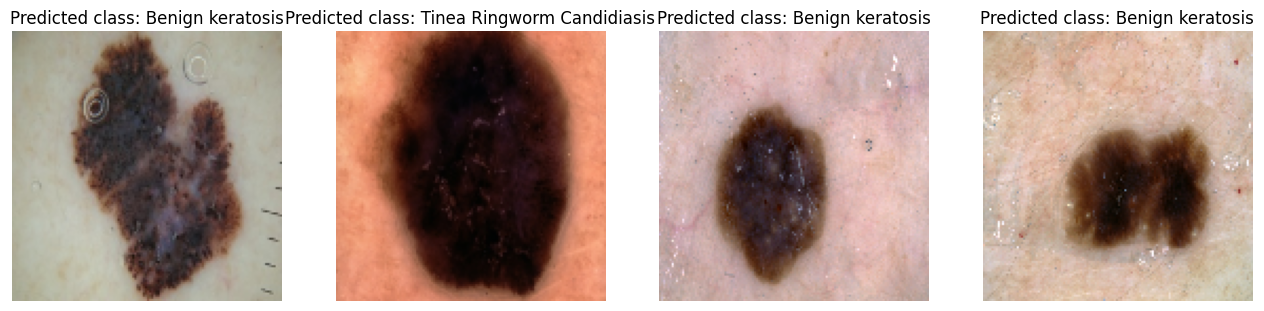

In [18]:
# List of image paths
image_paths = [
    'C:\\Users\\AJ\\project\\testing-img\\02.jpg',
    'C:\\Users\\AJ\\project\\testing-img\\01.jpg',
    'C:\\Users\\AJ\\project\\testing-img\\a.jpg',
        'C:\\Users\\AJ\\project\\testing-img\\b.jpg'
]
# Adjust the space between columns
plt.subplots_adjust(wspace=0.4)  # Increase this value to add more space between columns


# Create a figure and a grid of subplots
fig, axs = plt.subplots(nrows=1, ncols=len(image_paths), figsize=(4 * len(image_paths), 4))

# Loop over each image path
for i, image_path in enumerate(image_paths):
    # Load and preprocess the image
    original_image, preprocessed_image = load_and_preprocess_image(image_path)
    if original_image is not None and preprocessed_image is not None:
        # Predict the class
        predicted_label = model.predict(preprocessed_image)
        predicted_class = label_encoder.inverse_transform(np.argmax(predicted_label, axis=1))

        # Convert the original image back to uint8
        original_image_uint8 = (original_image * 255).astype(np.uint8)

        # Display the image in the corresponding subplot
        axs[i].imshow(cv2.cvtColor(original_image_uint8, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct coloring
        axs[i].set_title(f'Predicted class: {predicted_class[0]}')
        axs[i].axis('off')  # Hide axis

# Show the figure with all subplots
plt.show()


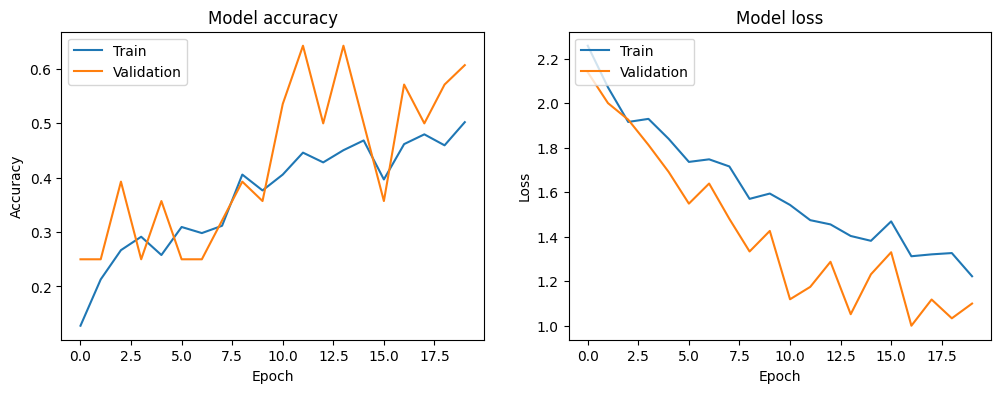

In [16]:
# Plot the training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()
